### *Определение точности предсказания NN в зависимости от различных параметров (кол-во нейронов в слое, кол-во слоев, оптимизаторы)*

In [ ]:
# !pip install keras

In [159]:
# !pip install tensorflow

Используем набор примеров fashion-MNIST

1. Опишите - какой результат нейросети получен в зависимости от:

-числа нейронов в слое (для 2-х слойной сети),

-числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых параметров).

-фиксируйте для тренировочного и тестового набора метрики accuracy.

2. Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1. Фиксируйте для тренировочного и тестового набора метрики accuracy.

3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе?

4. Для одного варианта сети сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота, точность).

In [200]:
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from keras.utils.np_utils import to_categorical
from keras.layers import Dense
from keras.models import Sequential
from keras import optimizers

In [201]:
#загружаем данные
(X_train, y_train_labels), (X_test, y_test_labels) = fashion_mnist.load_data()

print(X_train.shape, X_test.shape)
print(y_train_labels.shape)

(60000, 28, 28) (10000, 28, 28)
(60000,)


Label is 8


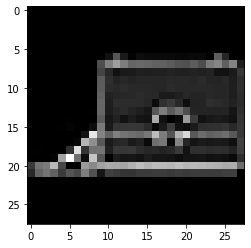

In [202]:
ind = np.random.randint(0, X_train.shape[0])
plt.imshow(X_train[ind], cmap='gray')
print(f'Label is {y_train_labels[ind]}')

In [203]:
class_names = ['T-shirt/top',
               'Trouser',
               'Pullover',
               'Dress',
               'Coat',
               'Sandal',
               'Shirt',
               'Sneaker',
               'Bag',
               'Ankle boot']

In [204]:
X_train.min(), X_train.max()

(0, 255)

In [205]:
# Нормировка
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train.min(), X_train.max()

(0.0, 1.0)

In [206]:
# Вытягивание признаков
X_train = X_train.reshape((-1, 28 * 28))
X_test = X_test.reshape((-1, 28 * 28))

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [207]:
# Разбиваем по категориям
y_train = to_categorical(y_train_labels)
y_test = to_categorical(y_test_labels)

In [208]:
# Обучаем двухслойную модель с разным кол-вом нейронов
neur = {}
for  i in range(1, 9):
    
    model = Sequential([
        Dense(2**i, input_shape=(28 * 28,), activation='relu'),
        Dense(10, activation='sigmoid')
    ])

    model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
    history = model.fit(X_train, y_train,
                        epochs=5,
                        batch_size=256,
                        verbose=1,
                        validation_data=(X_test, y_test)
                        )
    loss, metric = model.evaluate(X_test, y_test, batch_size=128)
    neur[2**i]= metric

Epoch 1/5
235/235 [==============================] - 4s 12ms/step - loss: 2.0667 - accuracy: 0.2014 - val_loss: 1.9517 - val_accuracy: 0.2586
Epoch 2/5
235/235 [==============================] - 2s 9ms/step - loss: 1.8821 - accuracy: 0.3473 - val_loss: 1.8257 - val_accuracy: 0.3921
Epoch 3/5
235/235 [==============================] - 2s 7ms/step - loss: 1.7658 - accuracy: 0.4048 - val_loss: 1.7145 - val_accuracy: 0.4088
Epoch 4/5
235/235 [==============================] - 2s 8ms/step - loss: 1.6540 - accuracy: 0.4190 - val_loss: 1.6070 - val_accuracy: 0.4219
Epoch 5/5
79/79 [==============================] - 0s 4ms/step - loss: 1.5154 - accuracy: 0.4423
Epoch 1/5
235/235 [==============================] - 3s 8ms/step - loss: 2.2155 - accuracy: 0.1064 - val_loss: 2.1253 - val_accuracy: 0.1576
Epoch 2/5
235/235 [==============================] - 1s 6ms/step - loss: 2.0038 - accuracy: 0.2807 - val_loss: 1.8782 - val_accuracy: 0.3606
Epoch 3/5
235/235 [==============================] - 2s 

Text(0, 0.5, 'Accuracy')

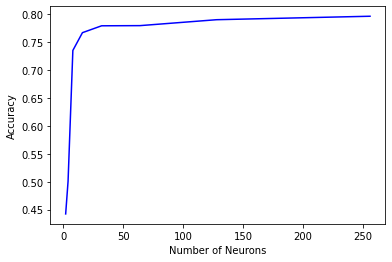

In [209]:
plt.plot(list(neur.keys()),list(neur.values()), 'b')
plt.xlabel('Number of Neurons')
plt.ylabel('Accuracy')

Чем больше нейронов в слое, тем лучше метрика. Но где-то после 50 нейронов метрика растёт незначительно. Оставим 100 нейронов, чтобы не перегружать модель.

In [210]:
# Обучаем модель с разным кол-вом слоёв
lay = {}
for  i in [2,3,5,10]:
    
    model = Sequential()
    for k in range(1,i):
        model.add(Dense(100, input_shape=(28 * 28,), activation='relu'))
    model.add(Dense(10, activation='sigmoid'))
    model.summary()

    model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
    history = model.fit(X_train, y_train,
                        epochs=5,
                        batch_size=256,
                        verbose=1,
                        validation_data=(X_test, y_test)
                        )
    loss, metric = model.evaluate(X_test, y_test, batch_size=128)
    lay[i]= metric

Model: "sequential_54"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_179 (Dense)           (None, 100)               78500     
                                                                 
 dense_180 (Dense)           (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
235/235 [==============================] - 3s 7ms/step - loss: 1.3262 - accuracy: 0.6158 - val_loss: 0.9427 - val_accuracy: 0.6970
Epoch 2/5
235/235 [==============================] - 1s 5ms/step - loss: 0.8279 - accuracy: 0.7374 - val_loss: 0.7736 - val_accuracy: 0.7454
Epoch 3/5
235/235 [==============================] - 2s 8ms/step - loss: 0.7149 - accuracy: 0.7711 - val_loss: 0.6973 - val_accuracy: 0.7691
Epoch 4/5
235/235 [===

Text(0, 0.5, 'Accuracy')

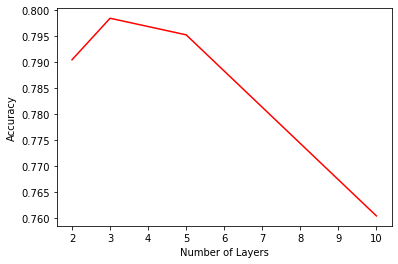

In [211]:
plt.plot(list(lay.keys()),list(lay.values()),'r')
plt.xlabel('Number of Layers')
plt.ylabel('Accuracy')

Лучшая метрика - у трёхслойной модели.

In [212]:
# Обучаем модель с разными оптимизаторами
optim = {}
opt = [optimizers.gradient_descent_v2.SGD(),
              optimizers.adagrad_v2.Adagrad(),
              optimizers.rmsprop_v2.RMSprop(),
              optimizers.adam_v2.Adam()]
model = Sequential([
        Dense(50, input_shape=(28 * 28,), activation='relu'),
        Dense(50, input_shape=(28 * 28,), activation='relu'),
        Dense(10, activation='sigmoid')
    ])
for i in opt:
    model.compile(loss='categorical_crossentropy', optimizer=i, metrics=['accuracy'])
    history = model.fit(X_train, y_train,
                            epochs=5,
                            batch_size=256,
                            verbose=1,
                            validation_data=(X_test, y_test)
                            )
    loss, metric = model.evaluate(X_test, y_test, batch_size=128)
    name = str(i).split(' ')[0].split('.')[-1]
    optim[name] = metric


Epoch 1/5
235/235 [==============================] - 3s 8ms/step - loss: 1.6057 - accuracy: 0.4973 - val_loss: 1.0902 - val_accuracy: 0.6734
Epoch 2/5
235/235 [==============================] - 1s 6ms/step - loss: 0.9041 - accuracy: 0.7213 - val_loss: 0.8068 - val_accuracy: 0.7409
Epoch 3/5
235/235 [==============================] - 1s 6ms/step - loss: 0.7356 - accuracy: 0.7634 - val_loss: 0.7129 - val_accuracy: 0.7562
Epoch 4/5
235/235 [==============================] - 2s 9ms/step - loss: 0.6565 - accuracy: 0.7850 - val_loss: 0.6465 - val_accuracy: 0.7827
Epoch 5/5
79/79 [==============================] - 1s 8ms/step - loss: 0.6043 - accuracy: 0.7961
Epoch 1/5
235/235 [==============================] - 2s 8ms/step - loss: 0.5800 - accuracy: 0.8072 - val_loss: 0.5948 - val_accuracy: 0.8009
Epoch 2/5
235/235 [==============================] - 2s 7ms/step - loss: 0.5712 - accuracy: 0.8096 - val_loss: 0.5878 - val_accuracy: 0.8028
Epoch 3/5
235/235 [==============================] - 2s 7

Text(0, 0.5, 'Accuracy')

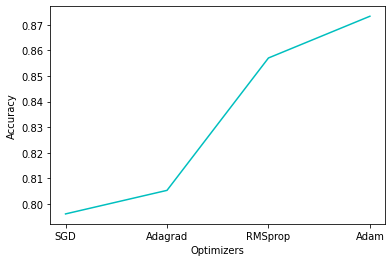

In [213]:
plt.plot(list(optim.keys()),list(optim.values()),'c')
plt.xlabel('Optimizers')
plt.ylabel('Accuracy')

Adam показал лучший результат. Причем разница между Adam и SGD приличная, около 10%

In [214]:
# Обучаем финальную модель с 3 слоями, 100 нейронами и оптимизатором Adam
model = Sequential([
        Dense(100, input_shape=(28 * 28,), activation='relu'),
        Dense(100, input_shape=(28 * 28,), activation='relu'),
        Dense(10, activation='sigmoid')
    ])

model.compile(loss='categorical_crossentropy', optimizer=optimizers.adam_v2.Adam(), metrics=['accuracy'])
history = model.fit(X_train, y_train,
                            epochs=5,
                            batch_size=256,
                            verbose=1,
                            validation_data=(X_test, y_test)
                            )
loss, metric = model.evaluate(X_test, y_test, batch_size=128)

Epoch 1/5
235/235 [==============================] - 4s 12ms/step - loss: 0.6189 - accuracy: 0.7901 - val_loss: 0.4882 - val_accuracy: 0.8284
Epoch 2/5
235/235 [==============================] - 2s 9ms/step - loss: 0.4112 - accuracy: 0.8546 - val_loss: 0.4218 - val_accuracy: 0.8521
Epoch 3/5
235/235 [==============================] - 3s 11ms/step - loss: 0.3697 - accuracy: 0.8680 - val_loss: 0.4080 - val_accuracy: 0.8576
Epoch 4/5
235/235 [==============================] - 2s 11ms/step - loss: 0.3412 - accuracy: 0.8762 - val_loss: 0.3958 - val_accuracy: 0.8589
Epoch 5/5
79/79 [==============================] - 0s 3ms/step - loss: 0.3606 - accuracy: 0.8705


In [215]:
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [216]:
y_pred_class = np.argmax(y_pred, axis=1)

In [217]:
y_test_class = np.argmax(y_test, axis=1)

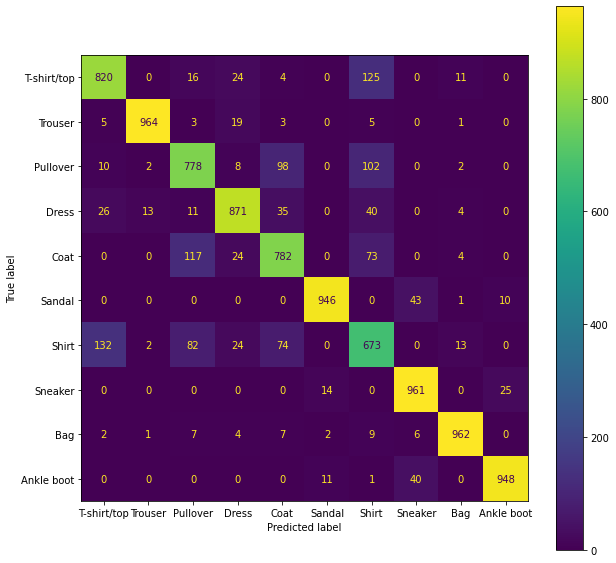

In [219]:
# Визуализируем матрицу ошибок
cm=confusion_matrix(y_test_class,y_pred_class)
disp = ConfusionMatrixDisplay(cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax=ax)
plt.show()

In [178]:
unique_test, counts_test = np.unique(y_test_class, return_counts=True)
unique_pred, counts_pred = np.unique(y_pred_class, return_counts=True)

In [179]:
# Рассчитываем полноту и точность для классов
recall = {}
precision = {}
trues = []
for i in range(len(y_test_class)):
    if y_test_class[i]==y_pred_class[i]:
        trues.append(y_test_class[i])
        
for i in range(10):
    recall[i] = trues.count(i) * 100 / counts_test[i]
    precision[i] = trues.count(i) * 100 / counts_pred[i]


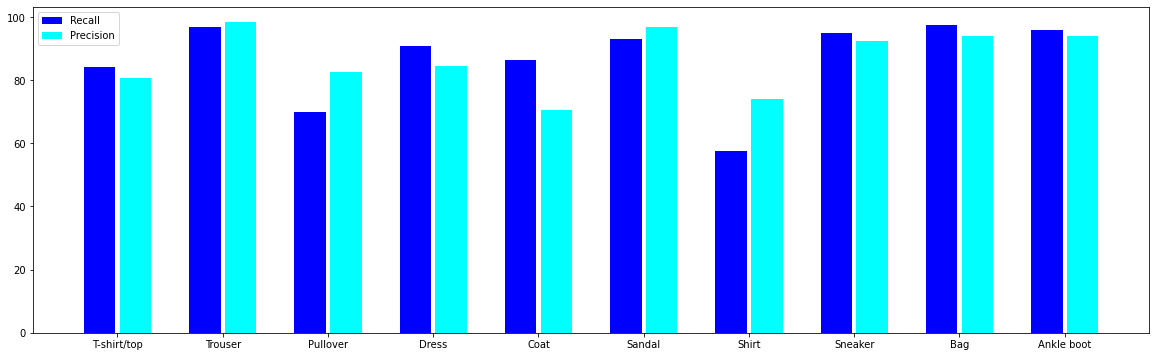

In [220]:
x = np.arange(10)#list(recall.keys()))
fig, ax = plt.subplots(figsize=(20, 6))
plt.bar (x-0.17, list(recall.values()), color='blue', alpha=1,width=0.3,label='Recall')
plt.bar (x+0.17, list(precision.values()), alpha=1,color='cyan', width=0.3,label='Precision')
plt.legend()
ax.set_xticks(x)
ax.set_xticklabels(class_names)
plt.show()

Больше всего сложностей возникло с рубашками.<br>
В случае пальто - сетка определила почти все пальто, но точность низковата - что-то другое приняла за пальто.<br>
Пуловеры - наоборот. Определила не все, но зато более менее точно.
